# Universidad Nacional de San Martín - Escuela de Ciencia y Tecnología
## Estadística e Inferencia I
### Segundo Cuatrimestre de 2024 - Primer Parcial
#### Ejercicio 3. Sesgo por omisión de variables relevantes.
---

**Objetivo**: Este ejercicio tiene como objetivo mostrar (y cualificar) el sesgo en la estimación de coeficientes de un modelo de regresión lineal múltiple estimado por *mínimos cuadrados ordinarios (MCO)* (o cuadrados mínimos)

----
**Enunciado**  |
Sea $Y \sim \mathcal{N}(\mu,  \sigma^2)$ donde $\mu=\beta_1 X_{1}+\beta_2 X_{2}+\beta_3 Z$ con $\sigma^2 =\beta_1=\beta_2=\beta_3 = 1$.

(a) Repetir 10.000 repeticiones la siguiente simulación:  
1.   Generar $n=30$ observaciones de las siguientes variables:  
$X_1\sim \mathcal{U}(0,1)$  
$X_2\sim \mathcal{U}(0,1)$  
$u \sim \mathcal{N}(0,1)$  
$\varepsilon \sim \mathcal{N}(0,\sigma^2)$  
$Z = X_1 + u$  
$Y = \beta_1 X_1 + \beta_2 X_2 + \beta_3 Z + \varepsilon$  
Es decir, $X_1$ y $Z$ *no* son independientes, mientras que $X_2$ y $Z$ *sí* lo son.
  
    
2.    En cada iteración, estimar por MCO  
    - el modelo completo (con covariables $X_1$, $X_2$ y $Z$)  
    - y, aparte, el modelo con $Z$ omitida (solo covariables $X_1$ y $X_2$)  
    Guardar los coeficientes estimados de cada modelo.  

3. Calcular la correlación entre $Z$ y las variables $X_1$ y $X_2$  

(b) A partir de las simulaciones

1. Calcular el promedio de las correlaciones entre $Z$ y las variables $X_1$ y $X_2$
2. Calcular el sesgo de las estimaciones de $\hat{\beta}_1$ y $\hat{\beta}_2$ del modelo con $Z$ omitida.
3. Graficar las distribuciones $\hat{\beta}_1$ y $\hat{\beta}_2$, comparando los resultados de ambos modelos.

---
**Criterios de Evaluación:**

* 25% Generación correcta de los datos y definición del modelo de simulación.
* 25% Implementación adecuada de la simulación de MonteCarlo (incl. estimaciones por MCO).
* 25% Generación de las medidas resúmen de información (incl. histogramas o similar)
* 25% Interpretación de los resultados y discusión sobre el sesgo por omisión de variables.


----
**Comentarios generales**
* Varios se limitaron a escribir el código, sin siquiera agregar comentarios para ayudar a que el código sea más legible por un tercero. Al margen de no ser una buena práctica de programación, hace imposible reconstruir qué estaban pensando cuando hicieron el ejercicio.
* Unos cuantos hicieron las 10_000 simulaciones para las distintas partes del ejercicio. Ésto no era lo pedido (la idea era que simularan los datos 1 sola vez). Son muchos los ejercicios que pueden pensarse en donde esa estrategia los hubiera conducidos a resultados erróneos.

In [1]:
# Importar librerías necesarias
import numpy as np
from numpy.linalg import inv
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt


In [2]:
# Funciones auxiliares

def simulate_sample(n):
  x1 = uniform.rvs(size=n)
  x2 = uniform.rvs(size=n)
  u = norm.rvs(size=n)
  z = 2*x1 + u

  noise = norm.rvs(size=n)
  y = x1 + x2 + z + noise

  return x1, x2, z, y

def estimate_full_model(x1, x2, z, y):
  X = np.column_stack([np.ones(len(x1)), x1, x2, z])
  betas = inv(X.T @ X) @ X.T @ y
  return betas

def estimate_omitted_model(x1, x2, y):
  X = np.column_stack([np.ones(len(x1)), x1, x2])
  betas = inv(X.T @ X) @ X.T @ y
  return betas


In [4]:
# Configuración de la simulación
n_simulations = 10000
n_obs = 30


# Run simulations
correlations = []
estimates_betas_full = []
estimates_betas_omitted = []


# Inciso (a)
for _ in range(n_simulations):

  # Simular datos (inciso a.1)
  x1, x2, z, y = simulate_sample(n_obs)

  # Estimate modelo completo y modelo omitido (inciso a.2)
  betas_full = estimate_full_model (x1,x2,z,y)
  betas_omitted = estimate_omitted_model(x1,x2,y)
  estimates_betas_full.append(betas_full)
  estimates_betas_omitted.append(betas_omitted)

  # Calculate correlations (inciso a.3)
  corr_z_x1 = np.corrcoef(z, x1)[0,1]
  corr_z_x2 = np.corrcoef(z, x2)[0,1]
  correlations.append((corr_z_x1, corr_z_x2))
  



# Convertir listas a arrays
correlations = np.array(correlations)
estimates_betas_full = np.array(estimates_betas_full)
estimates_betas_omitted = np.array(estimates_betas_omitted)

## Inciso (b). Análisis de resultados

In [5]:
# b.1. Calcular el promedio de las correlaciones

mean_correlation = correlations.mean(axis=0)

print('Correlación promedio entre Z y X1:', mean_correlation[0].round(3))
print('Correlación promedio entre Z y X2:', mean_correlation[1].round(3))

# Confirmamos que Z no es independiente de X1 pero sí es independiente de X2 

Correlación promedio entre Z y X1: 0.497
Correlación promedio entre Z y X2: 0.0


In [6]:
# Calculamos el sesgo
true_beta = 1
avg_bias_beta1 = (estimates_betas_omitted[:,1] - true_beta).mean()
avg_bias_beta2 = (estimates_betas_omitted[:,2] - true_beta).mean()

print('Sesgo promedio beta_1:', avg_bias_beta1.round(3))
print('Sesgo promedio beta_2:', avg_bias_beta2.round(3))


# Acá el objetivo es aproximar el momento poblacional:
#   sesgo = (esperanza de theta_hat) - true_theta
# por un momento muestral:
#    sesgo_empírico = media ( theta_hat - true_theta )
# La ley de los grandes números nos asegura que ambas magnitudes son "suficientemente  iguales" 
#   si el tamaño de la muestra es "suficientemente grande"


# Podemos ver que 
# i. El estimador de beta_1 del modelo con Z omitida está sesgado (con sesgo ~ 2)
# ii. El estimador de beta_2 del modelo con Z omitida parece ser insesgado

Sesgo promedio beta_1: 2.003
Sesgo promedio beta_2: 0.011


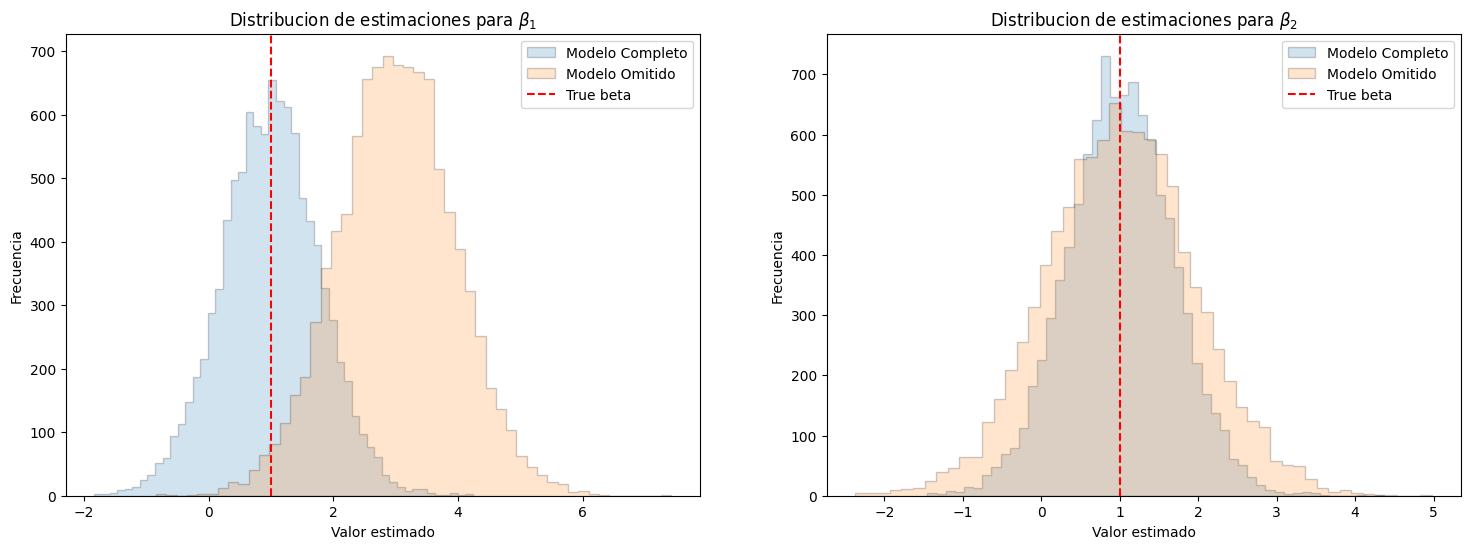

In [7]:
# b.3 Graficar lass distribuciones de los estimadores de beta_1 y beta_2, 
# comparando los resultados de ambos modelos 

# Esto podemos hacerlo calculando los histogramas de los estimadores de ambos modelos

fig, axs = plt.subplots(1,2, figsize=(18,6))

# En el primer subplot ponemos los estimadores de beta_1
axs[0].hist(estimates_betas_full[:,1], bins=50, alpha=.2, histtype='stepfilled', edgecolor='black',label='Modelo Completo')
axs[0].hist(estimates_betas_omitted[:,1], bins=50, alpha=.2, histtype='stepfilled', edgecolor='black', label='Modelo Omitido')
axs[0].axvline(x=1, color='red', linestyle='--', label='True beta')
axs[0].legend()
axs[0].set_title('Distribucion de estimaciones para $\\beta_1$')
axs[0].set_xlabel('Valor estimado')
axs[0].set_ylabel('Frecuencia')

# En el segundo, los correspondientes da beta_2
axs[1].hist(estimates_betas_full[:,2], bins=50, alpha=.2, histtype='stepfilled', edgecolor='black', label='Modelo Completo')
axs[1].hist(estimates_betas_omitted[:,2], bins=50, alpha=.2, histtype='stepfilled', edgecolor='black', label='Modelo Omitido')
axs[1].axvline(x=1, color='red', linestyle='--', label='True beta')
axs[1].legend()
axs[1].set_title('Distribucion de estimaciones para $\\beta_2$')
axs[1].set_xlabel('Valor estimado')
axs[1].set_ylabel('Frecuencia')

plt.show()


# Ahora podemos observar mejor que 
# i. los estimadores por MCO del modelo completo son insesgados 
#    (ambas distribuciones están centradas en "true beta")
# ii. El estimador de beta_1 del modelo con Z omitida está sesgado 
#    (su distribución está "desplazada" respecto a "true_beta")
# iii. El estimador de beta_2 es insesgado